<a href="https://colab.research.google.com/github/kidais-lab/Mad-Libs-Generator/blob/master/2023_2020_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Necessary Libraries:**

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from google.colab import drive


**Load the Data:**

In [59]:
data_2020 = pd.read_csv('Tawjihi2020.csv')

In [60]:
data_2023 = pd.read_csv('Tawjihi2023.csv')

In [61]:
print("Tawjihi2023 Dataset Head:")
print(data_2023.head())

Tawjihi2023 Dataset Head:
  area  year                                  school  average  branch  \
0   WB  2023  الشهيد عز الدين القسام الثانوية للبنين     79.1  الأدبي   
1   WB  2023  الشهيد عز الدين القسام الثانوية للبنين     60.6  الأدبي   
2   WB  2023  الشهيد عز الدين القسام الثانوية للبنين     69.0  الأدبي   
3   WB  2023  الشهيد عز الدين القسام الثانوية للبنين     56.6  الأدبي   
4   WB  2023  الشهيد عز الدين القسام الثانوية للبنين     64.0  الأدبي   

  school_gender  
0          ذكور  
1          ذكور  
2          ذكور  
3          ذكور  
4          ذكور  


In [62]:
print("Tawjihi2020 Dataset Head:")
print(data_2020.head())

Tawjihi2020 Dataset Head:
  gender      DOB  religion  year directorate  branch  sum  average  result
0   إناث  00:00.0       NaN  2020      قباطية  الأدبي  365     52.1     NaN
1   إناث  00:00.0       NaN  2020      الوسطى  الادبي  656     93.7     NaN
2   إناث  00:00.0       NaN  2020      الوسطى  العلمي  589     84.1     NaN
3   ذكور  00:00.0       NaN  2020     غرب غزة  العلمي  458     65.4     NaN
4   ذكور  00:00.0       NaN  2020         رفح  الشرعي  525     75.0     NaN


In [64]:
print("Tawjihi2023 Dataset Info:")
print(data_2023.info())

Tawjihi2023 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76313 entries, 0 to 76312
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area           76313 non-null  object 
 1   year           76313 non-null  int64  
 2   school         76313 non-null  object 
 3   average        76313 non-null  float64
 4   branch         76313 non-null  object 
 5   school_gender  76313 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 3.5+ MB
None


In [65]:
print("Tawjihi2020 Dataset Info:")
print(data_2020.info())

Tawjihi2020 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68696 entries, 0 to 68695
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       68696 non-null  object 
 1   DOB          68696 non-null  object 
 2   religion     0 non-null      float64
 3   year         68696 non-null  int64  
 4   directorate  68696 non-null  object 
 5   branch       68696 non-null  object 
 6   sum          68696 non-null  int64  
 7   average      68696 non-null  float64
 8   result       0 non-null      float64
dtypes: float64(3), int64(2), object(4)
memory usage: 4.7+ MB
None


In [66]:
print("Tawjihi2023 Dataset Describtion:")
print(data_2023.describe())

Tawjihi2023 Dataset Describtion:
          year       average
count  76313.0  76313.000000
mean    2023.0     72.358424
std        0.0     23.840384
min     2023.0      0.000000
25%     2023.0     64.900000
50%     2023.0     77.400000
75%     2023.0     88.300000
max     2023.0     99.900000


In [67]:
print("Tawjihi2020 Dataset Describtion:")
print(data_2020.describe())

Tawjihi2020 Dataset Describtion:
       religion     year           sum       average  result
count       0.0  68696.0  68696.000000  68696.000000     0.0
mean        NaN   2020.0    528.823614     75.355682     NaN
std         NaN      0.0     94.097451     13.148630     NaN
min         NaN   2020.0    263.000000     50.000000     NaN
25%         NaN   2020.0    452.000000     64.600000     NaN
50%         NaN   2020.0    531.000000     75.700000     NaN
75%         NaN   2020.0    609.000000     86.600000     NaN
max         NaN   2020.0    844.000000     99.700000     NaN


In [68]:
# Identifying Missing and Anomalous Data
missing_values_2023 = data_2023.isnull().sum()
missing_values_2020 = data_2020.isnull().sum()
print("Missing values in 2023 dataset:")
print(missing_values_2023)
print("Missing values in 2020 dataset:")
print(missing_values_2020)

Missing values in 2023 dataset:
area             0
year             0
school           0
average          0
branch           0
school_gender    0
dtype: int64
Missing values in 2020 dataset:
gender             0
DOB                0
religion       68696
year               0
directorate        0
branch             0
sum                0
average            0
result         68696
dtype: int64


In [69]:
# Identifying Zero Values
zero_values_2023 = (data_2023 == 0).sum()
zero_values_2020 = (data_2020 == 0).sum()
print("Zero values in 2023 dataset:")
print(zero_values_2023)
print("Zero values in 2020 dataset:")
print(zero_values_2020)

Zero values in 2023 dataset:
area                0
year                0
school              0
average          5597
branch              0
school_gender       0
dtype: int64
Zero values in 2020 dataset:
gender         0
DOB            0
religion       0
year           0
directorate    0
branch         0
sum            0
average        0
result         0
dtype: int64


In [71]:
# Handle zero values in Tawjihi2023
# Remove rows with zero 'average'
data_2023_cleaned = data_2023[data_2023['average'] != 0]
print(data_2023_cleaned)

      area  year                                   school  average  \
0       WB  2023   الشهيد عز الدين القسام الثانوية للبنين     79.1   
1       WB  2023   الشهيد عز الدين القسام الثانوية للبنين     60.6   
2       WB  2023   الشهيد عز الدين القسام الثانوية للبنين     69.0   
3       WB  2023   الشهيد عز الدين القسام الثانوية للبنين     56.6   
4       WB  2023   الشهيد عز الدين القسام الثانوية للبنين     64.0   
...    ...   ...                                      ...      ...   
76308   GA  2023  مصطفى صادق الرافعي الثانوية للصم - بنين     58.8   
76309   GA  2023  مصطفى صادق الرافعي الثانوية للصم - بنين     57.8   
76310   GA  2023  مصطفى صادق الرافعي الثانوية للصم - بنين     56.4   
76311   GA  2023  مصطفى صادق الرافعي الثانوية للصم - بنين     54.6   
76312   GA  2023  مصطفى صادق الرافعي الثانوية للصم - بنين     70.2   

                  branch school_gender  
0                 الأدبي          ذكور  
1                 الأدبي          ذكور  
2                 الأدبي          ذك

In [72]:
# Handle NULL and Zero values in Tawjihi2020
# Remove columns with all NULL and zero values
data_2020_cleaned = data_2020.drop(columns=['religion', 'result', 'DOB'])
print(data_2020_cleaned)

      gender  year directorate  branch  sum  average
0       إناث  2020      قباطية  الأدبي  365     52.1
1       إناث  2020      الوسطى  الادبي  656     93.7
2       إناث  2020      الوسطى  العلمي  589     84.1
3       ذكور  2020     غرب غزة  العلمي  458     65.4
4       ذكور  2020         رفح  الشرعي  525     75.0
...      ...   ...         ...     ...  ...      ...
68691   إناث  2020       نابلس  العلمي  463     66.1
68692   إناث  2020     قلقيلية  الأدبي  544     77.7
68693   إناث  2020      طولكرم  الأدبي  481     68.7
68694   إناث  2020        جنين  الأدبي  604     86.3
68695   إناث  2020     قلقيلية  العلمي  686     98.0

[68696 rows x 6 columns]


In [73]:
data_2020_cleaned = pd.read_csv('cleaned_data_2020.csv')

In [74]:
data_2020_cleaned

,gender,year,directorate,branch,sum,average,area
0,إناث,2020.0,قباطية,الأدبي,365.0,52.1,WB
1,إناث,2020.0,الوسطى,الادبي,656.0,93.7,GA
2,إناث,2020.0,الوسطى,العلمي,589.0,84.1,GA
3,ذكور,2020.0,غرب غزة,العلمي,458.0,65.4,GA
4,ذكور,2020.0,رفح,الشرعي,525.0,75.0,GA
...,...,...,...,...,...,...,...
68692,إناث,2020.0,قلقيلية,الأدبي,544.0,77.7,WB
68693,إناث,2020.0,طولكرم,الأدبي,481.0,68.7,WB
68694,إناث,2020.0,جنين,الأدبي,604.0,86.3,WB
68695,إناث,2020.0,قلقيلية,العلمي,686.0,98.0,WB


In [75]:
data_2023_cleaned = pd.read_csv('cleaned_data_2023.csv')

In [76]:
data_2023_cleaned

,area,year,school,average,branch,school_gender
0,WB,2023.0,الشهيد عز الدين القسام الثانوية للبنين,79.1,الأدبي,ذكور
1,WB,2023.0,الشهيد عز الدين القسام الثانوية للبنين,60.6,الأدبي,ذكور
2,WB,2023.0,الشهيد عز الدين القسام الثانوية للبنين,69.0,الأدبي,ذكور
3,WB,2023.0,الشهيد عز الدين القسام الثانوية للبنين,56.6,الأدبي,ذكور
4,WB,2023.0,الشهيد عز الدين القسام الثانوية للبنين,64.0,الأدبي,ذكور
...,...,...,...,...,...,...
70712,GA,2023.0,مصطفى صادق الرافعي الثانوية للصم - بنين,57.8,كفاءة مهنية صناعي,ذكور
70713,GA,2023.0,مصطفى صادق الرافعي الثانوية للصم - بنين,56.4,كفاءة مهنية صناعي,ذكور
70714,GA,2023.0,مصطفى صادق الرافعي الثانوية للصم - بنين,54.6,كفاءة مهنية صناعي,ذكور
70715,GA,2023.0,مصطفى صادق الرافعي الثانوية للصم - بنين,70.2,كفاءة مهنية صناعي,ذكور


In [77]:
# Remove non-numeric rows and unnecessary columns
data_2020_cleaned = data_2020_cleaned[data_2020_cleaned['branch'] != '40107']
data_2023_cleaned = data_2023_cleaned[data_2023_cleaned['branch'] != '70716']

# Ensure all 'average' values are numeric and handle NaNs
data_2020_cleaned['average'] = pd.to_numeric(data_2020_cleaned['average'], errors='coerce')
data_2023_cleaned['average'] = pd.to_numeric(data_2023_cleaned['average'], errors='coerce')

data_2020_cleaned.dropna(subset=['average'], inplace=True)
data_2023_cleaned.dropna(subset=['average'], inplace=True)

<ipython-input-77-06eed0c92d15>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2020_cleaned['average'] = pd.to_numeric(data_2020_cleaned['average'], errors='coerce')
<ipython-input-77-06eed0c92d15>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2020_cleaned.dropna(subset=['average'], inplace=True)


**Descriptive Statistics for 2020 and 2023 Datasets**

In [79]:
import pandas as pd

# Load the cleaned datasets
data_2020_cleaned = pd.read_csv('cleaned_data_2020.csv')
data_2023_cleaned = pd.read_csv('cleaned_data_2023.csv')

# Calculate descriptive statistics
def descriptive_statistics(data, column):
    mean = data[column].mean()
    median = data[column].median()
    std_dev = data[column].std()
    min_value = data[column].min()
    max_value = data[column].max()

    return {
        'Mean': mean,
        'Median': median,
        'Standard Deviation': std_dev,
        'Minimum Value': min_value,
        'Maximum Value': max_value
    }

# Assuming 'average' is the column of interest in both datasets
stats_2020 = descriptive_statistics(data_2020_cleaned, 'average')
stats_2023 = descriptive_statistics(data_2023_cleaned, 'average')

# Convert the results to DataFrame for better visualization
stats_df_2020 = pd.DataFrame(stats_2020, index=[0])
stats_df_2023 = pd.DataFrame(stats_2023, index=[0])

# Print the results
print("Descriptive Statistics for 2020 Dataset:")
print(stats_df_2020)
print("\nDescriptive Statistics for 2023 Dataset:")
print(stats_df_2023)

Descriptive Statistics for 2020 Dataset:
        Mean  Median  Standard Deviation  Minimum Value  Maximum Value
0  75.938409    75.7          153.298505           50.0        40107.0

Descriptive Statistics for 2023 Dataset:
        Mean  Median  Standard Deviation  Minimum Value  Maximum Value
0  79.084299    79.0          265.941842           50.0        70716.0


**Calculate Correlation Coefficients:**

Since we need to calculate the correlation between branch scores and overall performance, we'll create a pivot table to transform the data and then compute the correlation matrix.

In [13]:
# Ensure all 'average' values are numeric and handle NaNs
data_2020_cleaned['average'] = pd.to_numeric(data_2020_cleaned['average'], errors='coerce')
data_2023_cleaned['average'] = pd.to_numeric(data_2023_cleaned['average'], errors='coerce')

# Drop rows with missing 'average' values
data_2020_cleaned.dropna(subset=['average'], inplace=True)
data_2023_cleaned.dropna(subset=['average'], inplace=True)

<ipython-input-13-0545be71ac34>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2020_cleaned['average'] = pd.to_numeric(data_2020_cleaned['average'], errors='coerce')
<ipython-input-13-0545be71ac34>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2020_cleaned.dropna(subset=['average'], inplace=True)


**For 2020 Data:**

In [25]:
# Group by branch and calculate the mean of 'average'
branch_means_2020 = data_2020_cleaned.groupby('branch')['average'].mean().reset_index()

# Create a wide format DataFrame
pivot_2020 = pd.DataFrame()

for branch in branch_means_2020['branch'].unique():
    branch_data = data_2020_cleaned[data_2020_cleaned['branch'] == branch][['average']]
    branch_data.columns = [branch]
    pivot_2020 = pd.concat([pivot_2020, branch_data.reset_index(drop=True)], axis=1)

# Calculate correlation matrix
correlation_2020 = pivot_2020.corr()

print("Correlation matrix for 2020 data:")
print(correlation_2020)

Correlation matrix for 2020 data:
                            الأدبي    الادبي  الاقتصاد المنزلي  التكنولوجي  \
الأدبي                    1.000000 -0.002219          0.082952    0.031275   
الادبي                   -0.002219  1.000000          0.141719    0.070996   
الاقتصاد المنزلي          0.082952  0.141719          1.000000    0.016892   
التكنولوجي                0.031275  0.070996          0.016892    1.000000   
الريادة و الأعمال         0.009532  0.019703         -0.001875    0.001636   
الريادة والأعمال          0.005556 -0.007830          0.075351    0.013183   
الزراعي                   0.217082 -0.070810          0.145654    0.065209   
الزراعي المهني           -0.058542 -0.086843         -0.130443   -0.149826   
الشرعي                   -0.003154  0.007892         -0.016261   -0.028322   
الصناعي                  -0.016596  0.007473          0.019919   -0.026838   
العلمي                   -0.012357  0.004914          0.050587    0.008296   
الفندقي                   0.18

**For 2023 Data:**

In [15]:
# Group by branch and calculate the mean of 'average'
branch_means_2023 = data_2023_cleaned.groupby('branch')['average'].mean().reset_index()

# Create a wide format DataFrame
pivot_2023 = pd.DataFrame()

for branch in branch_means_2023['branch'].unique():
    branch_data = data_2023_cleaned[data_2023_cleaned['branch'] == branch][['average']]
    branch_data.columns = [branch]
    pivot_2023 = pd.concat([pivot_2023, branch_data.reset_index(drop=True)], axis=1)

# Calculate correlation matrix
correlation_2023 = pivot_2023.corr()

print("Correlation matrix for 2023 data:")
print(correlation_2023)

Correlation matrix for 2023 data:
                            الأدبي  الاقتصاد المنزلي  الريادة والأعمال  \
الأدبي                    1.000000          0.038909          0.042360   
الاقتصاد المنزلي          0.038909          1.000000          0.088374   
الريادة والأعمال          0.042360          0.088374          1.000000   
الزراعي                  -0.005211          0.023325         -0.013502   
الشرعي                    0.001948          0.008044          0.081101   
الصناعي                  -0.026245         -0.008454         -0.012858   
العلمي                   -0.005684         -0.050040         -0.033638   
الفندقي                   0.167192          0.281158          0.106345   
كفاءة مهنية اقتصاد منزلي -0.109636         -0.066810         -0.077890   
كفاءة مهنية زراعي        -0.263365         -0.025343         -0.100617   
كفاءة مهنية صناعي         0.079937         -0.136878          0.030536   
كفاءة مهنية فندقي         0.214455          0.364313          0.204538   

   

**Heatmap correlation matrix for 2023 dataset**

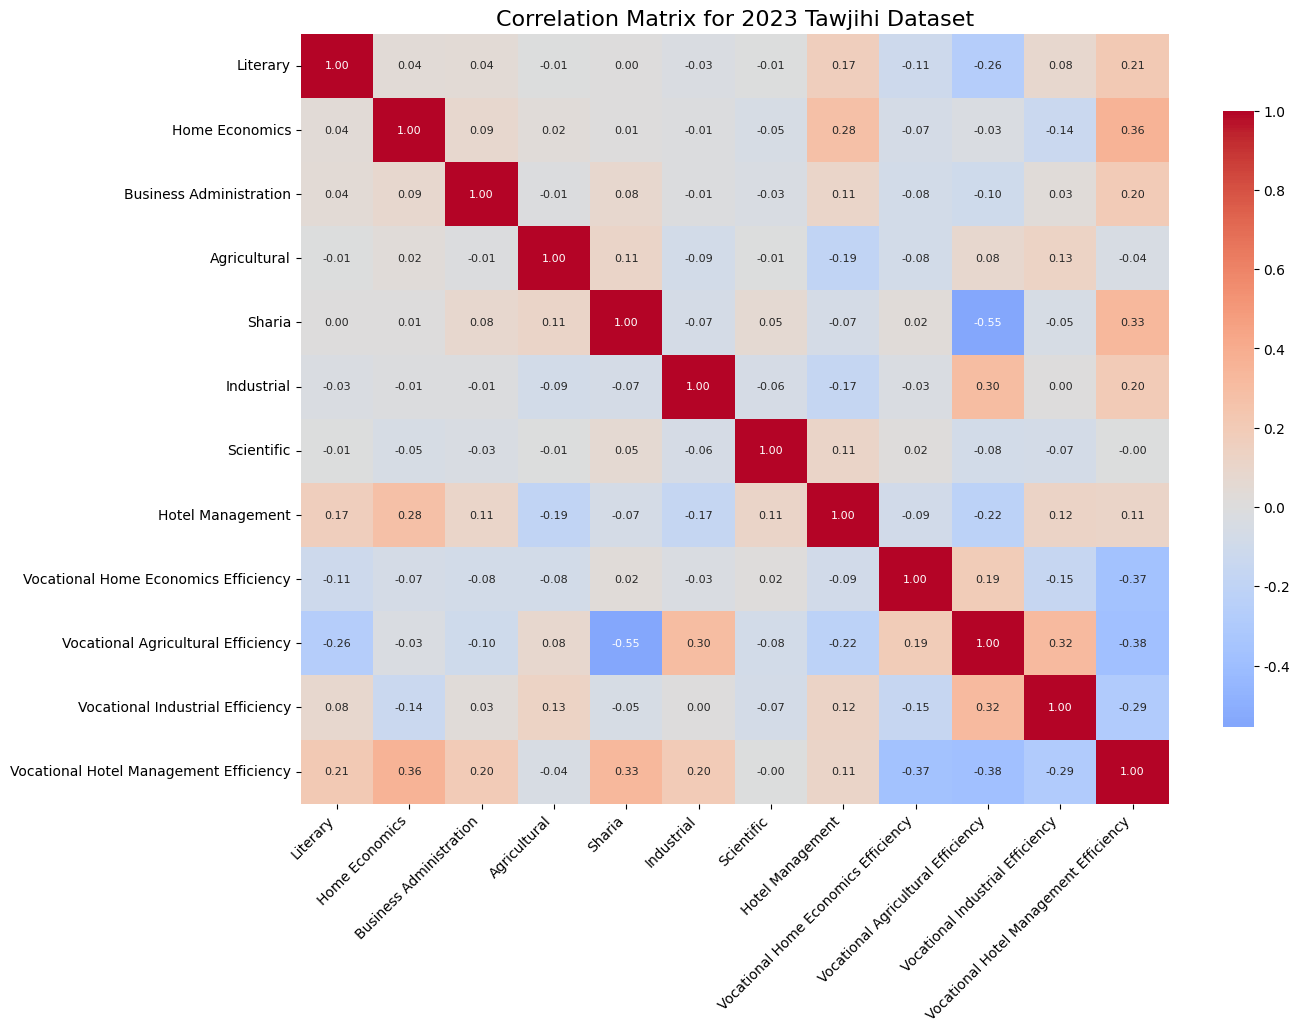

In [24]:
# Heatmap correlation matrix for 2023 Tawjihi data
# Define the correlation matrix

data = {
    'Literary': [1.000000, 0.038909, 0.042360, -0.005211, 0.001948, -0.026245, -0.005684, 0.167192, -0.109636, -0.263365, 0.079937, 0.214455],
    'Home Economics': [0.038909, 1.000000, 0.088374, 0.023325, 0.008044, -0.008454, -0.050040, 0.281158, -0.066810, -0.025343, -0.136878, 0.364313],
    'Business Administration': [0.042360, 0.088374, 1.000000, -0.013502, 0.081101, -0.012858, -0.033638, 0.106345, -0.077890, -0.100617, 0.030536, 0.204538],
    'Agricultural': [-0.005211, 0.023325, -0.013502, 1.000000, 0.109956, -0.086294, -0.007423, -0.190361, -0.080242, 0.079664, 0.130228, -0.043612],
    'Sharia': [0.001948, 0.008044, 0.081101, 0.109956, 1.000000, -0.065466, 0.054064, -0.066760, 0.024754, -0.554349, -0.051196, 0.334869],
    'Industrial': [-0.026245, -0.008454, -0.012858, -0.086294, -0.065466, 1.000000, -0.062078, -0.171402, -0.026623, 0.300248, 0.002730, 0.196309],
    'Scientific': [-0.005684, -0.050040, -0.033638, -0.007423, 0.054064, -0.062078, 1.000000, 0.113391, 0.015092, -0.083640, -0.068852, -0.003794],
    'Hotel Management': [0.167192, 0.281158, 0.106345, -0.190361, -0.066760, -0.171402, 0.113391, 1.000000, -0.090073, -0.217911, 0.123349, 0.110990],
    'Vocational Home Economics Efficiency': [-0.109636, -0.066810, -0.077890, -0.080242, 0.024754, -0.026623, 0.015092, -0.090073, 1.000000, 0.187151, -0.154170, -0.371442],
    'Vocational Agricultural Efficiency': [-0.263365, -0.025343, -0.100617, 0.079664, -0.554349, 0.300248, -0.083640, -0.217911, 0.187151, 1.000000, 0.317375, -0.382538],
    'Vocational Industrial Efficiency': [0.079937, -0.136878, 0.030536, 0.130228, -0.051196, 0.002730, -0.068852, 0.123349, -0.154170, 0.317375, 1.000000, -0.290029],
    'Vocational Hotel Management Efficiency': [0.214455, 0.364313, 0.204538, -0.043612, 0.334869, 0.196309, -0.003794, 0.110990, -0.371442, -0.382538, -0.290029, 1.000000]
}
columns = ['Literary', 'Home Economics', 'Business Administration', 'Agricultural', 'Sharia', 'Industrial', 'Scientific', 'Hotel Management', 'Vocational Home Economics Efficiency', 'Vocational Agricultural Efficiency', 'Vocational Industrial Efficiency', 'Vocational Hotel Management Efficiency']

correlation_matrix_2023 = pd.DataFrame(data, index=columns, columns=columns)

# Set up the font and text direction
matplotlib.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

# Plotting the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_2023, annot=True, cmap='coolwarm', center=0, fmt=".2f", annot_kws={"size": 8}, cbar_kws={"shrink": 0.8})
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Matrix for 2023 Tawjihi Dataset', fontsize=16)
plt.show()

**Heatmap correlation matrix for 2020 dataset**

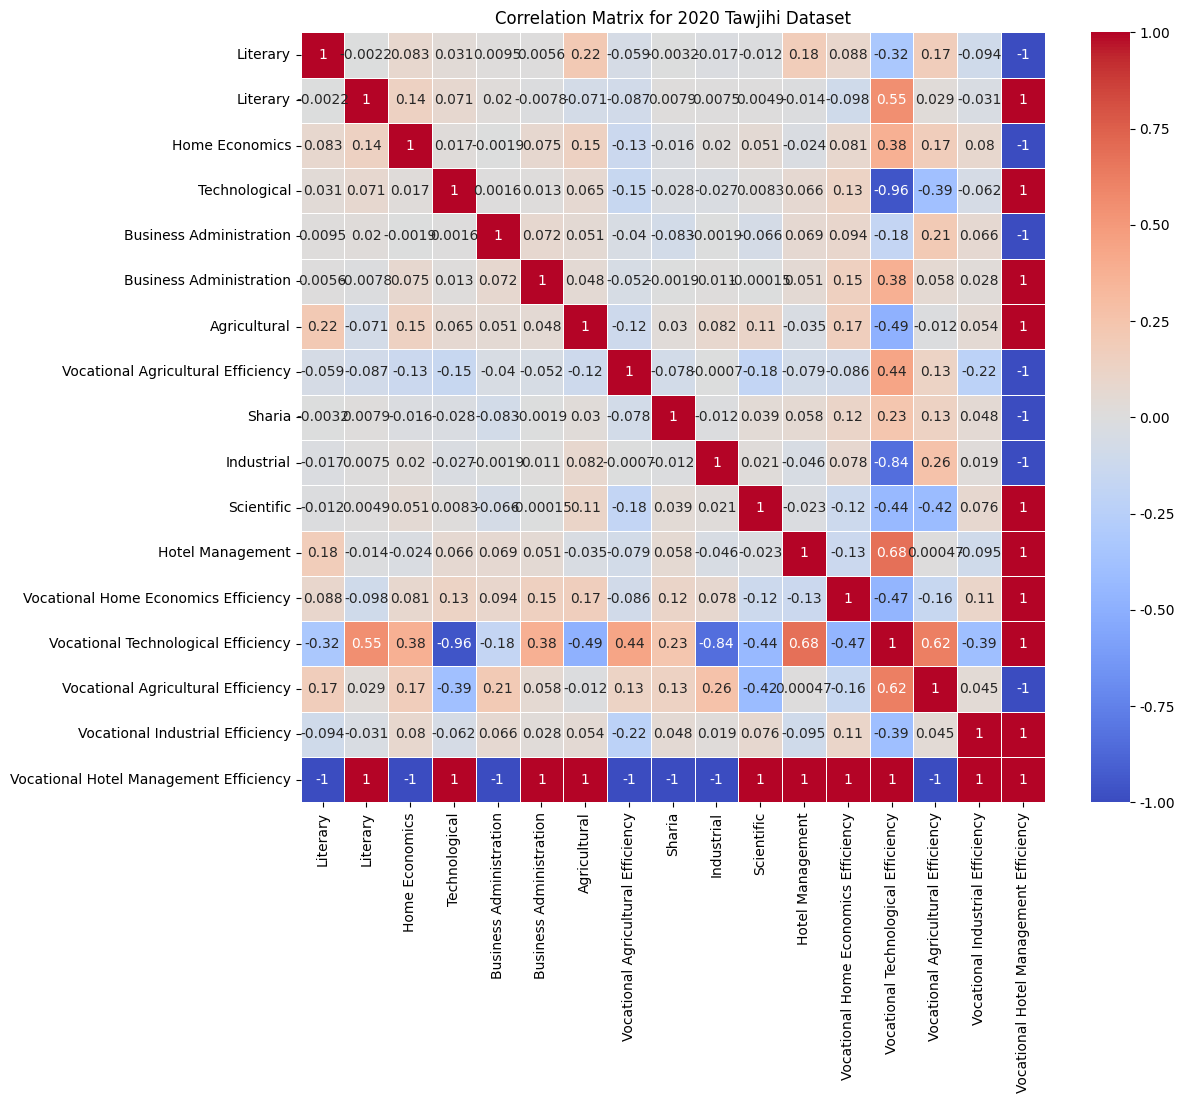

In [28]:
# Heatmap correlation matrix for 2023 Tawjihi data

# Define the correlation matrix
correlation_2020 = pd.DataFrame({
    'Literary': [1.000000, -0.002219, 0.082952, 0.031275, 0.009532, 0.005556, 0.217082, -0.058542, -0.003154, -0.016596, -0.012357, 0.180443, 0.088209, -0.322826, 0.173365, -0.094173, -1.000000],
    'Literary_2': [-0.002219, 1.000000, 0.141719, 0.070996, 0.019703, -0.007830, -0.070810, -0.086843, 0.007892, 0.007473, 0.004914, -0.013898, -0.097746, 0.553916, 0.028623, -0.031261, 1.000000],
    'Home Economics': [0.082952, 0.141719, 1.000000, 0.016892, -0.001875, 0.075351, 0.145654, -0.130443, -0.016261, 0.019919, 0.050587, -0.024314, 0.080935, 0.377368, 0.172544, 0.080328, -1.000000],
    'Technological': [0.031275, 0.070996, 0.016892, 1.000000, 0.001636, 0.013183, 0.065209, -0.149826, -0.028322, -0.026838, 0.008296, 0.065879, 0.126442, -0.959074, -0.387097, -0.062342, 1.000000],
    'Business Administration': [0.009532, 0.019703, -0.001875, 0.001636, 1.000000, 0.071891, 0.051350, -0.039784, -0.082571, -0.001882, -0.065759, 0.068748, 0.093674, -0.179162, 0.206055, 0.065519, -1.000000],
    'Business Administration_2': [0.005556, -0.007830, 0.075351, 0.013183, 0.071891, 1.000000, 0.047556, -0.051698, -0.001890, 0.010937, -0.000153, 0.051350, 0.152781, 0.380758, 0.057708, 0.028381, 1.000000],
    'Agricultural': [0.217082, -0.070810, 0.145654, 0.065209, 0.051350, 0.047556, 1.000000, -0.115729, 0.029956, 0.082135, 0.114303, -0.034598, 0.170071, -0.490202, -0.011516, 0.053843, 1.000000],
    'Vocational Agricultural Efficiency_2': [-0.058542, -0.086843, -0.130443, -0.149826, -0.039784, -0.051698, -0.115729, 1.000000, -0.078419, -0.000702, -0.183301, -0.078682, -0.086381, 0.441593, 0.129060, -0.221965, -1.000000],
    'Sharia': [-0.003154, 0.007892, -0.016261, -0.028322, -0.082571, -0.001890, 0.029956, -0.078419, 1.000000, -0.011988, 0.039207, 0.057600, 0.115875, 0.234725, 0.133909, 0.048120, -1.000000],
    'Industrial': [-0.016596, 0.007473, 0.019919, -0.026838, -0.001882, 0.010937, 0.082135, -0.000702, -0.011988, 1.000000, 0.020941, -0.046488, 0.077771, -0.837577, 0.258351, 0.018886, -1.000000],
    'Scientific': [-0.012357, 0.004914, 0.050587, 0.008296, -0.065759, -0.000153, 0.114303, -0.183301, 0.039207, 0.020941, 1.000000, -0.023023, -0.123255, -0.436452, -0.417992, 0.076154, 1.000000],
    'Hotel Management': [0.180443, -0.013898, -0.024314, 0.065879, 0.068748, 0.051350, -0.034598, -0.078682, 0.057600, -0.046488, -0.023023, 1.000000, -0.131198, 0.684022, 0.000470, -0.094914, 1.000000],
    'Vocational Home Economics Efficiency': [0.088209, -0.097746, 0.080935, 0.126442, 0.093674, 0.152781, 0.170071, -0.086381, 0.115875, 0.077771, -0.123255, -0.131198, 1.000000, -0.465422, -0.155064, 0.107049, 1.000000],
    'Vocational Technological Efficiency': [-0.322826, 0.553916, 0.377368, -0.959074, -0.179162, 0.380758, -0.490202, 0.441593, 0.234725, -0.837577, -0.436452, 0.684022, -0.465422, 1.000000, 0.624458, -0.391025, 1.000000],
    'Vocational Agricultural Efficiency': [0.173365, 0.028623, 0.172544, -0.387097, 0.206055, 0.057708, -0.011516, 0.129060, 0.133909, 0.258351, -0.417992, 0.000470, -0.155064, 0.624458, 1.000000, 0.044704, -1.000000],
    'Vocational Industrial Efficiency': [-0.094173, -0.031261, 0.080328, -0.062342, 0.065519, 0.028381, 0.053843, -0.221965, 0.048120, 0.018886, 0.076154, -0.094914, 0.107049, -0.391025, 0.044704, 1.000000, 1.000000],
    'Vocational Hotel Management Efficiency': [-1.000000, 1.000000, -1.000000, 1.000000, -1.000000, 1.000000, 1.000000, -1.000000, -1.000000, -1.000000, 1.000000, 1.000000, 1.000000, 1.000000, -1.000000, 1.000000, 1.000000]
}, index=['Literary', 'Literary_2', 'Home Economics', 'Technological', 'Business Administration', 'Business Administration_2', 'Agricultural', 'Vocational Agricultural Efficiency_2', 'Sharia', 'Industrial', 'Scientific', 'Hotel Management', 'Vocational Home Economics Efficiency', 'Vocational Technological Efficiency', 'Vocational Agricultural Efficiency', 'Vocational Industrial Efficiency', 'Vocational Hotel Management Efficiency'])

correlation_matrix_2020 = pd.DataFrame(data, index=columns, columns=columns)

# Rename the columns and index
renamed_columns = {
    'Literary': 'Literary',
    'Literary_2': 'Literary',
    'Home Economics': 'Home Economics',
    'Technological': 'Technological',
    'Business Administration': 'Business Administration',
    'Business Administration_2': 'Business Administration',
    'Agricultural': 'Agricultural',
    'Vocational Agricultural Efficiency_2': 'Vocational Agricultural Efficiency',
    'Sharia': 'Sharia',
    'Industrial': 'Industrial',
    'Scientific': 'Scientific',
    'Hotel Management': 'Hotel Management',
    'Vocational Home Economics Efficiency': 'Vocational Home Economics Efficiency',
    'Vocational Technological Efficiency': 'Vocational Technological Efficiency',
    'Vocational Agricultural Efficiency': 'Vocational Agricultural Efficiency',
    'Vocational Industrial Efficiency': 'Vocational Industrial Efficiency',
    'Vocational Hotel Management Efficiency': 'Vocational Hotel Management Efficiency'
}

correlation_2020.rename(columns=renamed_columns, index=renamed_columns, inplace=True)

# Set up the font and text direction
matplotlib.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_2020, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix for 2020 Tawjihi Dataset')
plt.show()


**Distribution and Density Analysis of Scores**

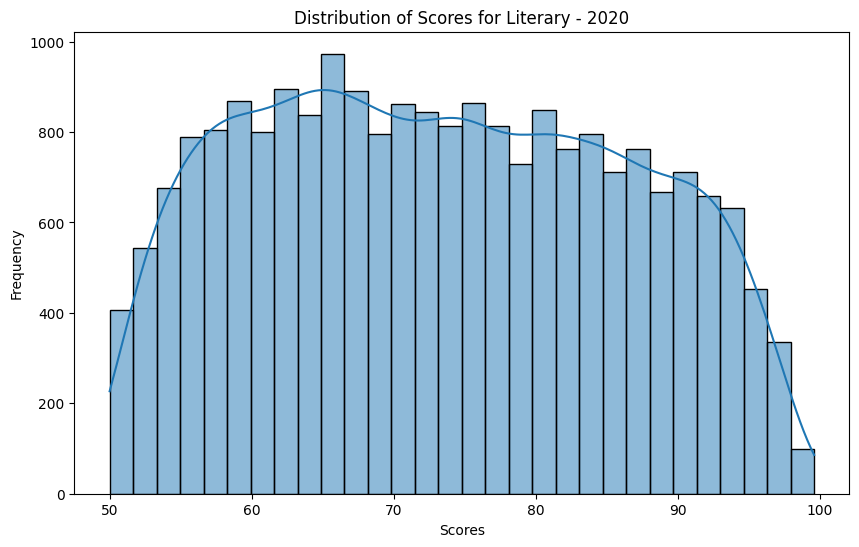

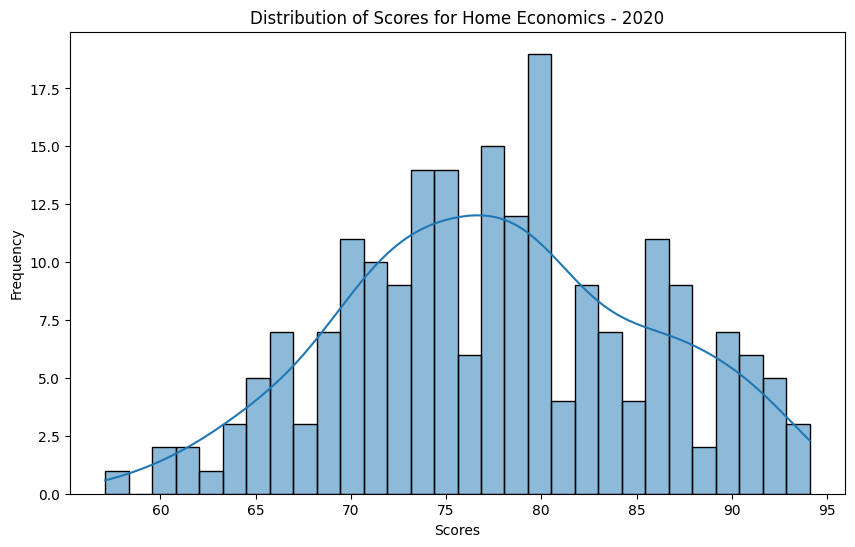

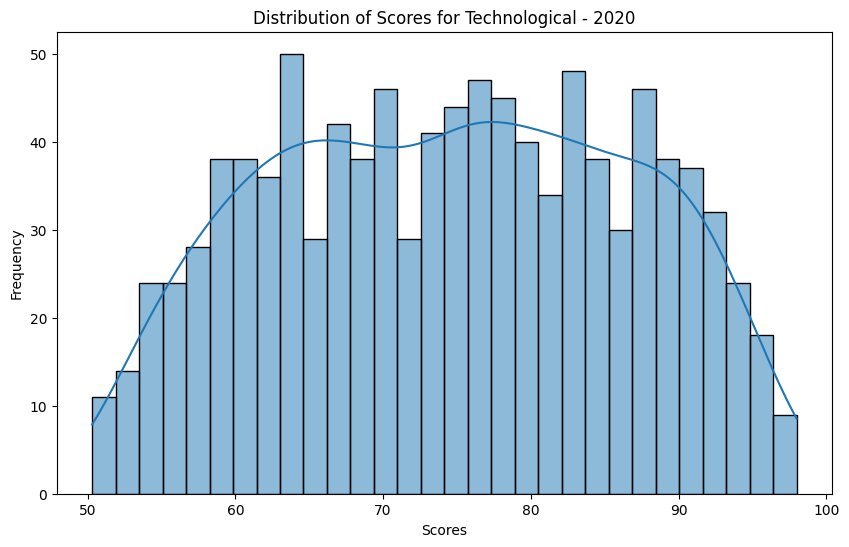

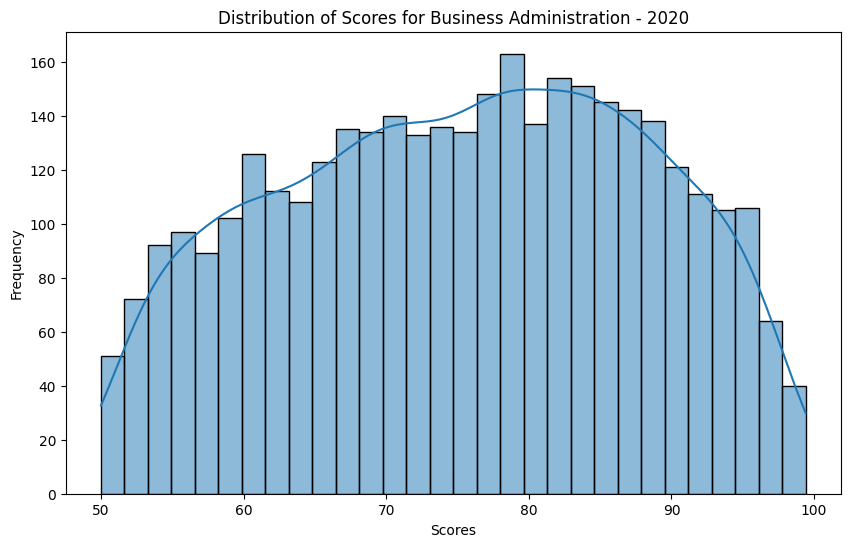

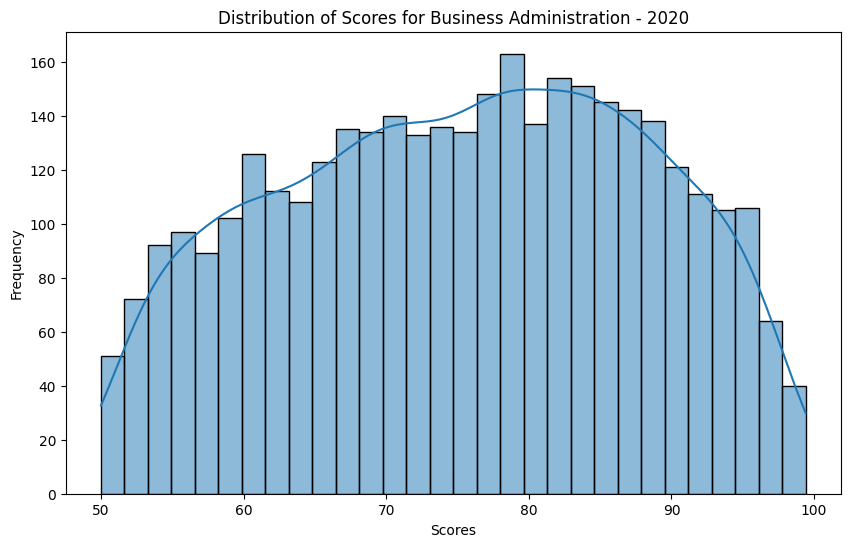

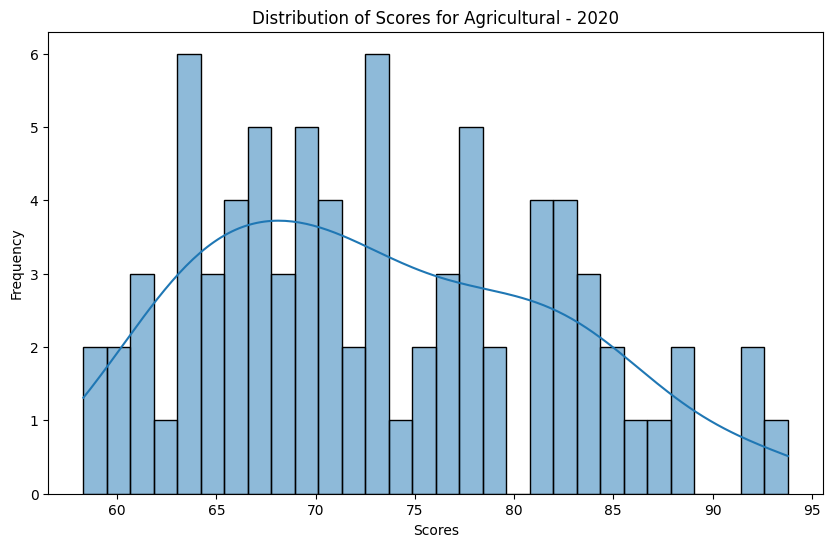

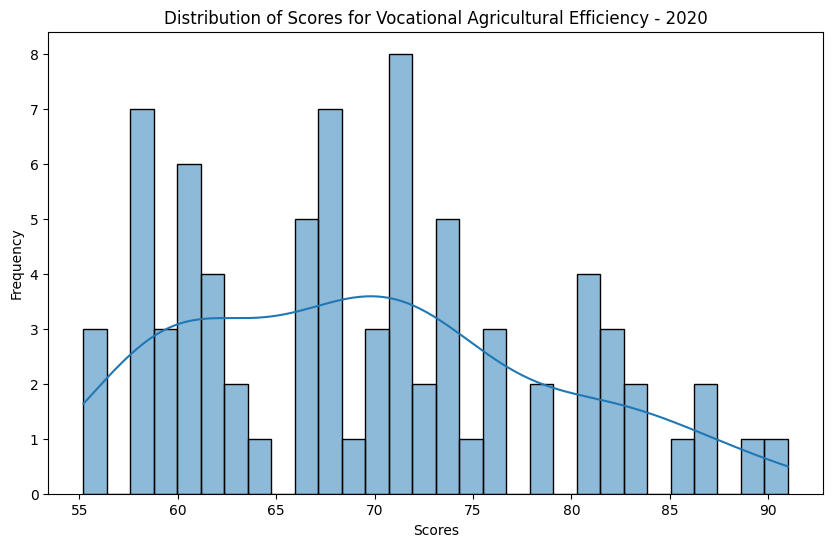

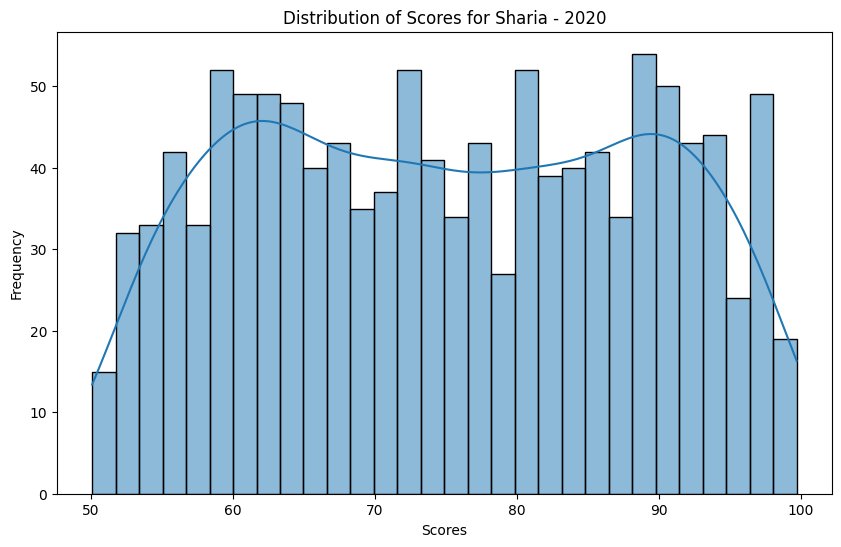

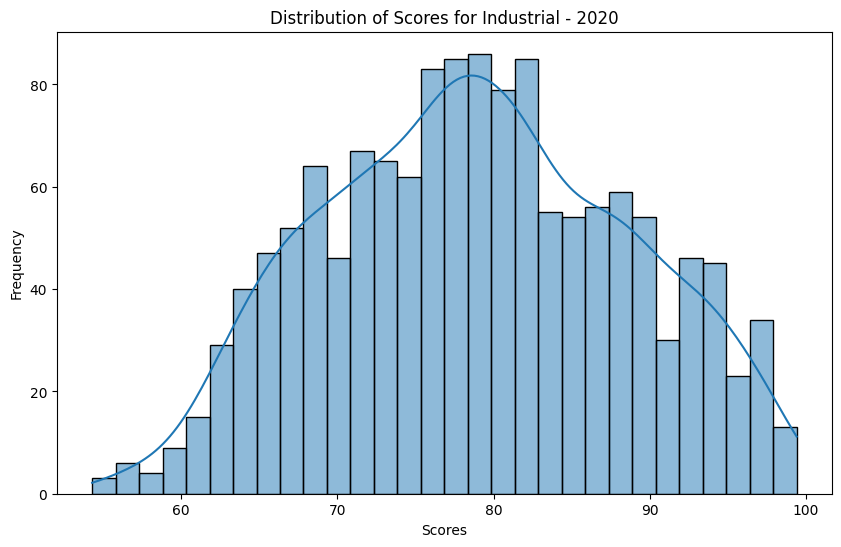

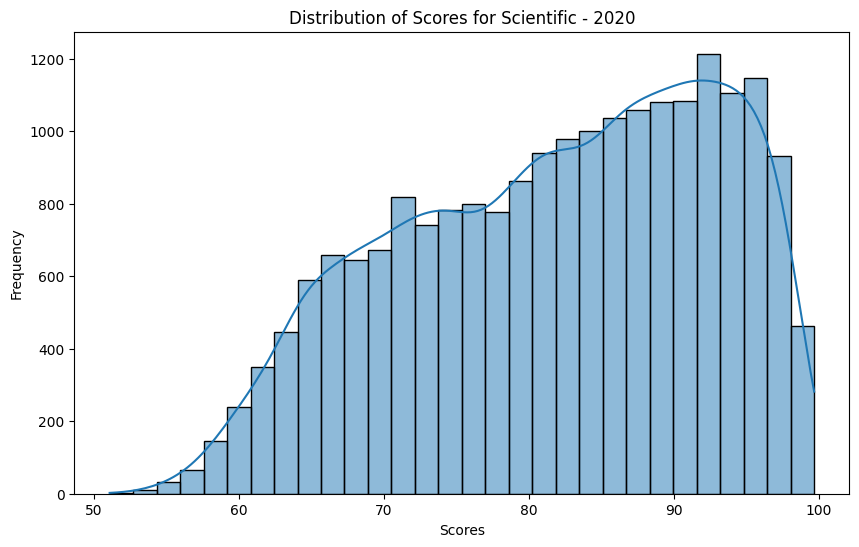

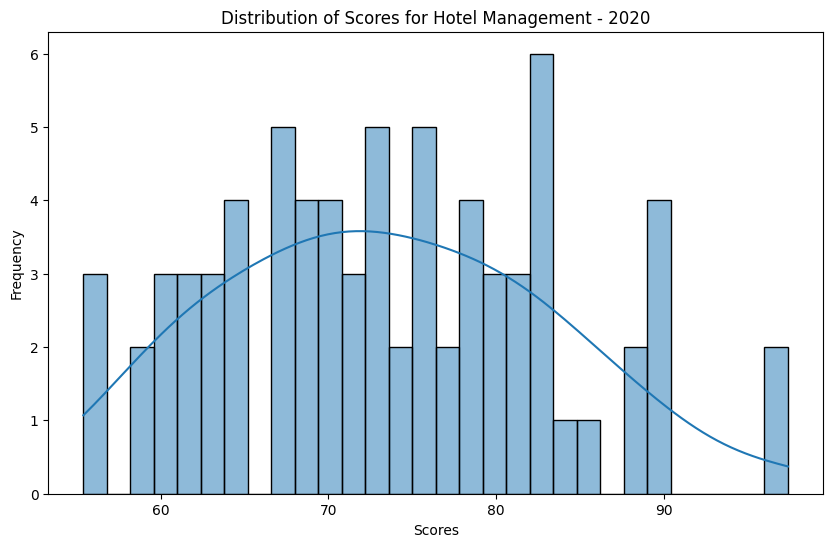

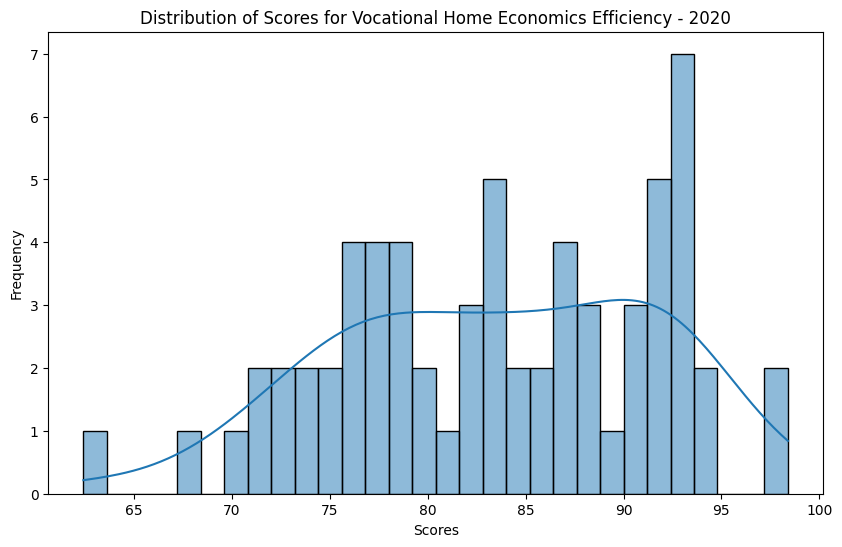

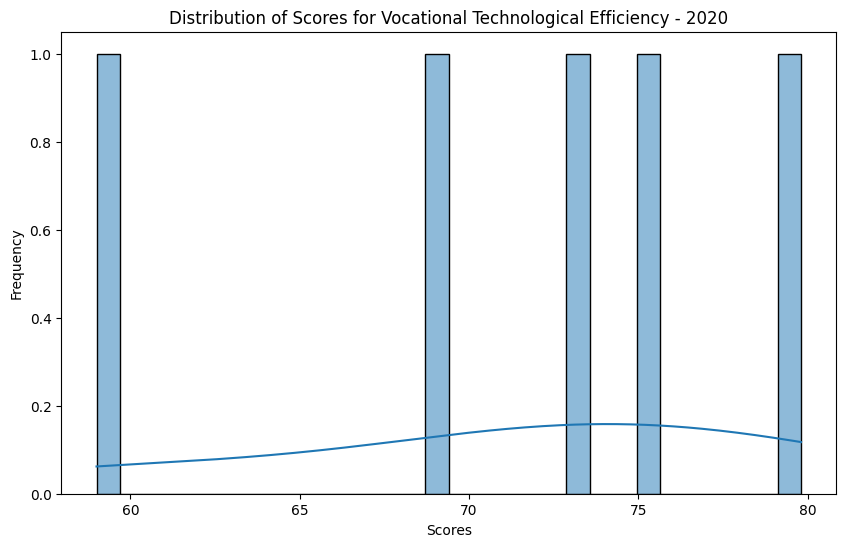

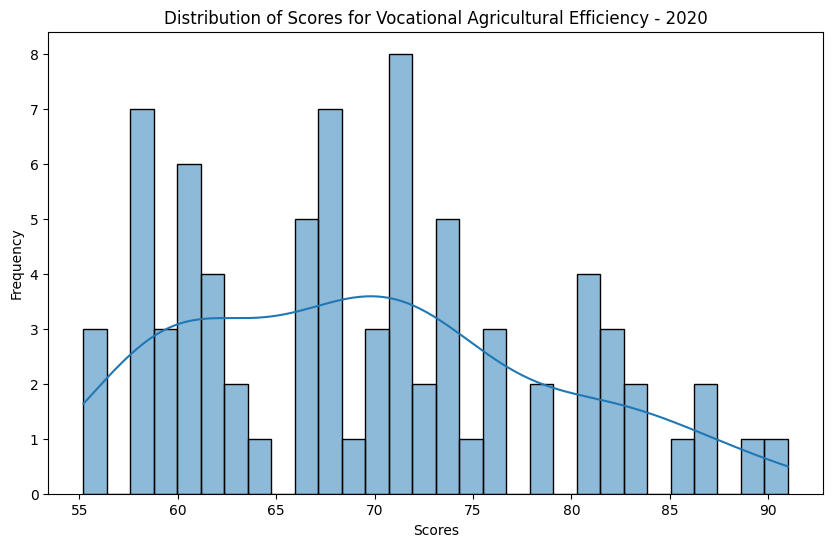

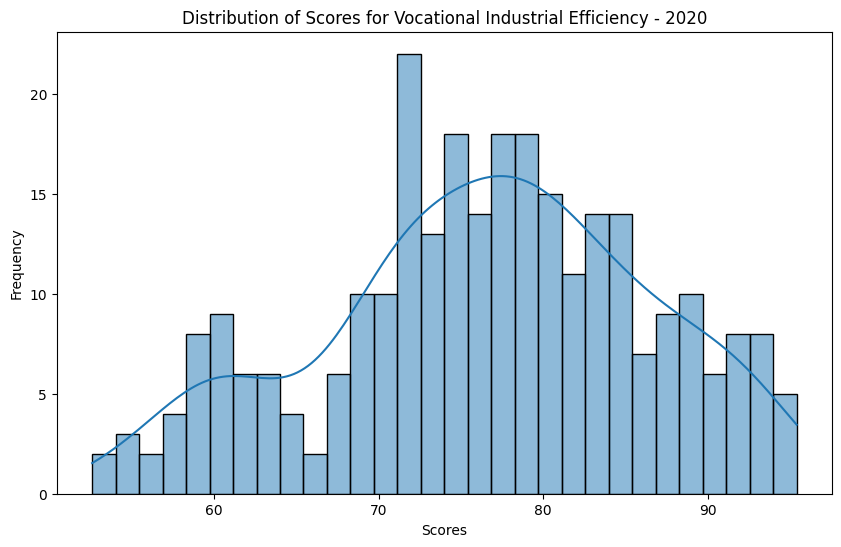

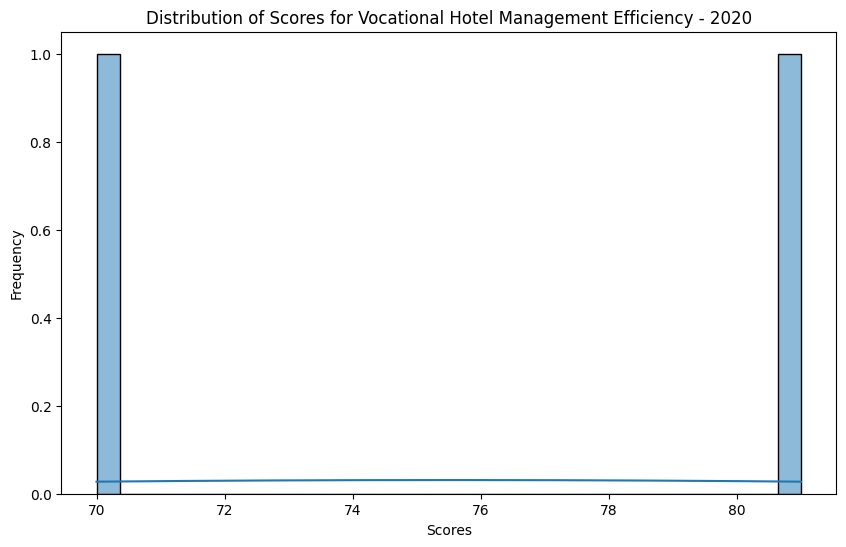

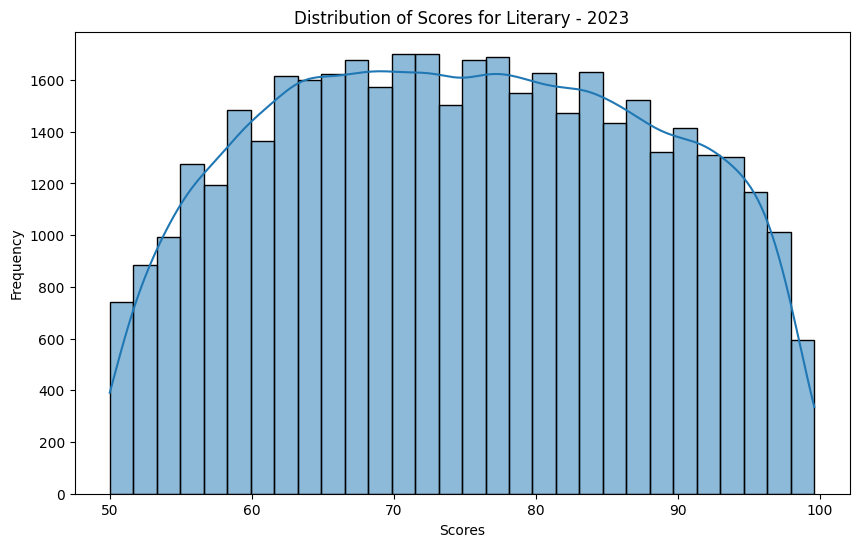

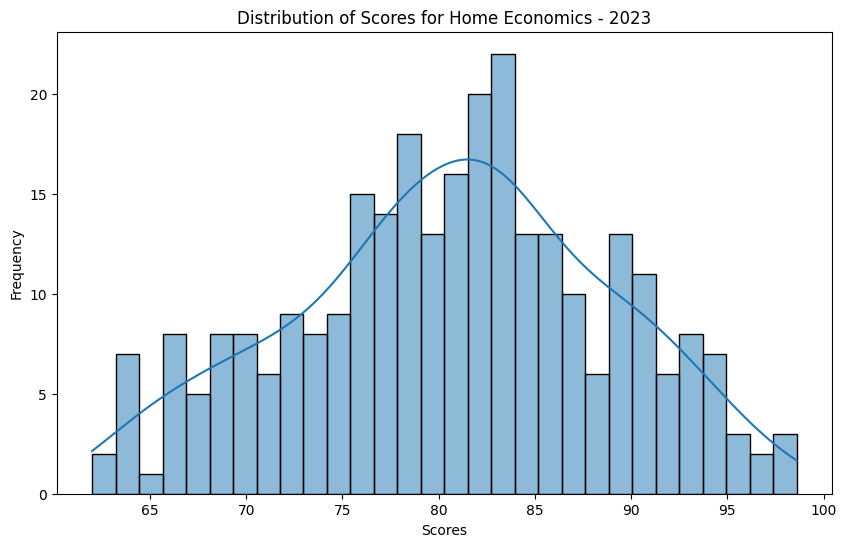

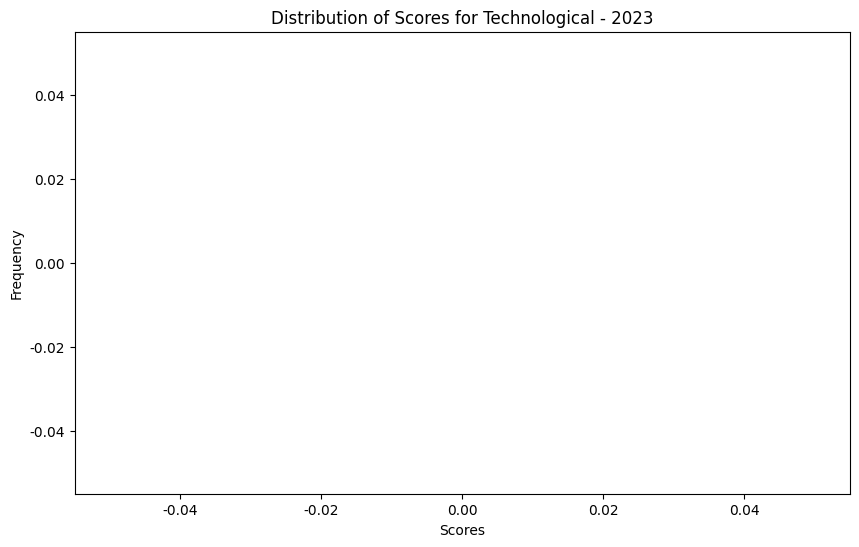

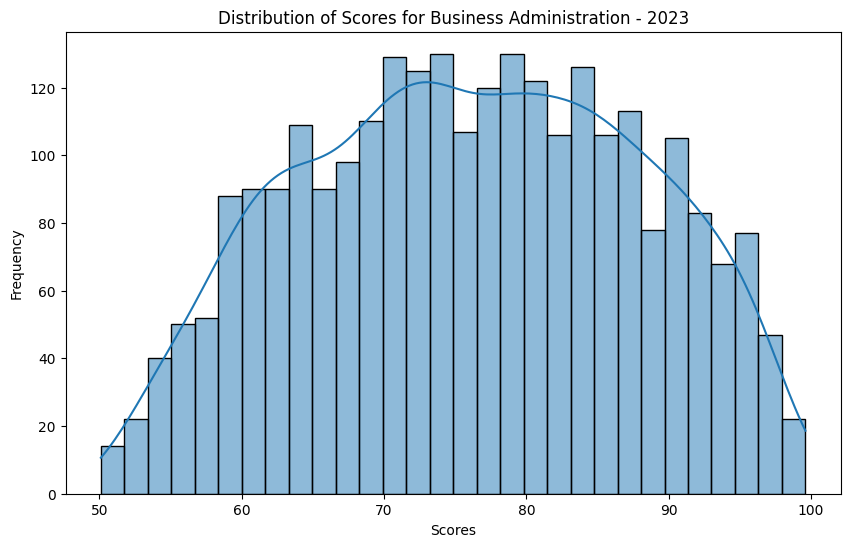

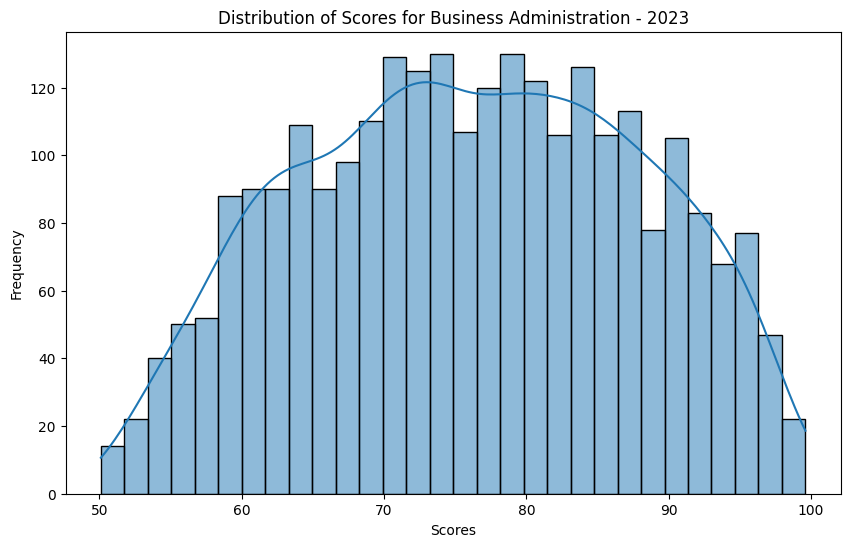

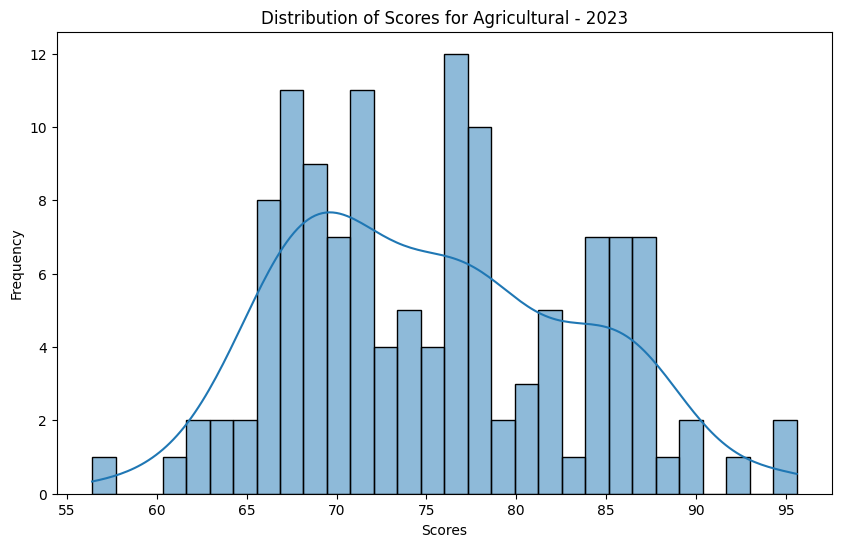

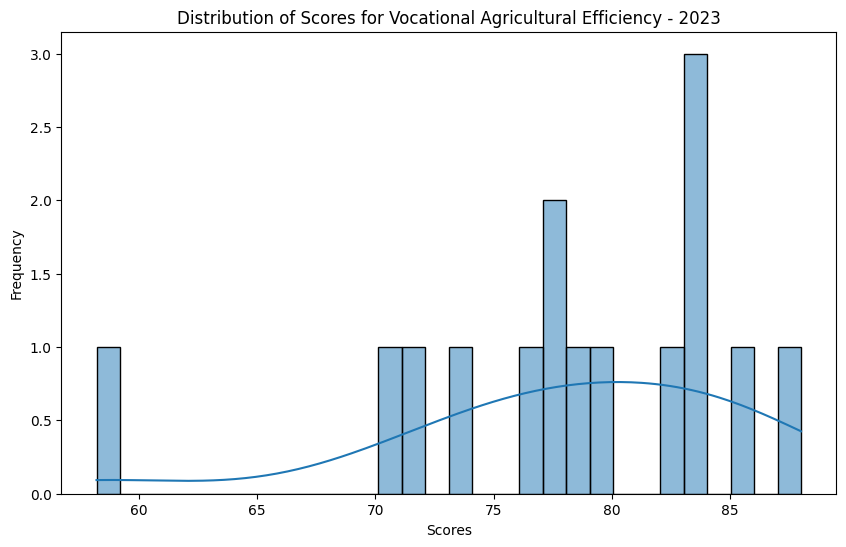

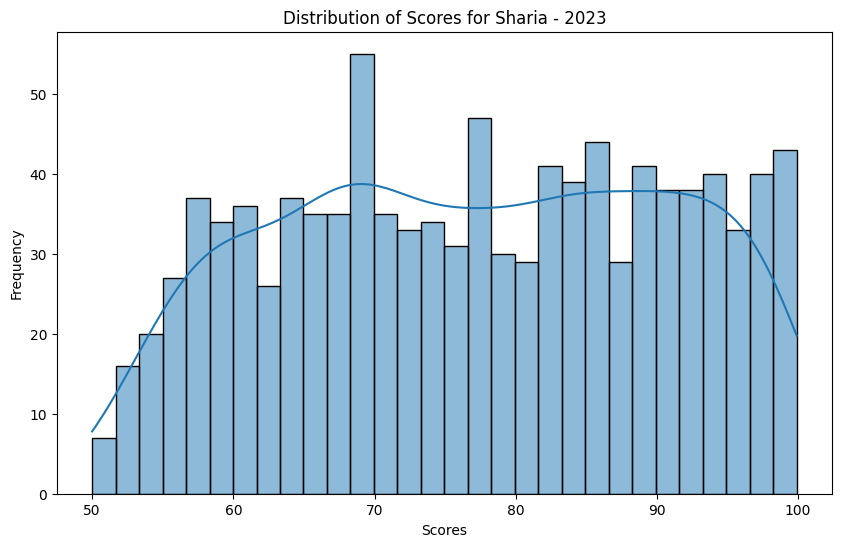

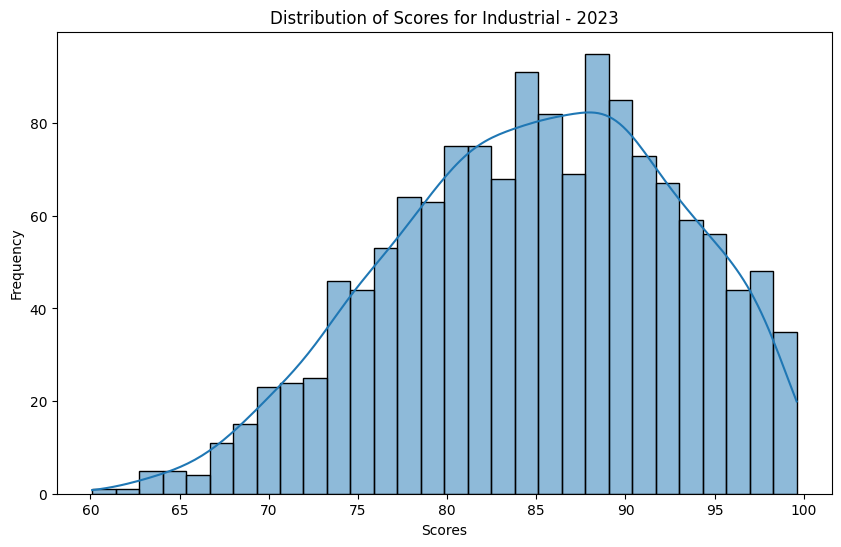

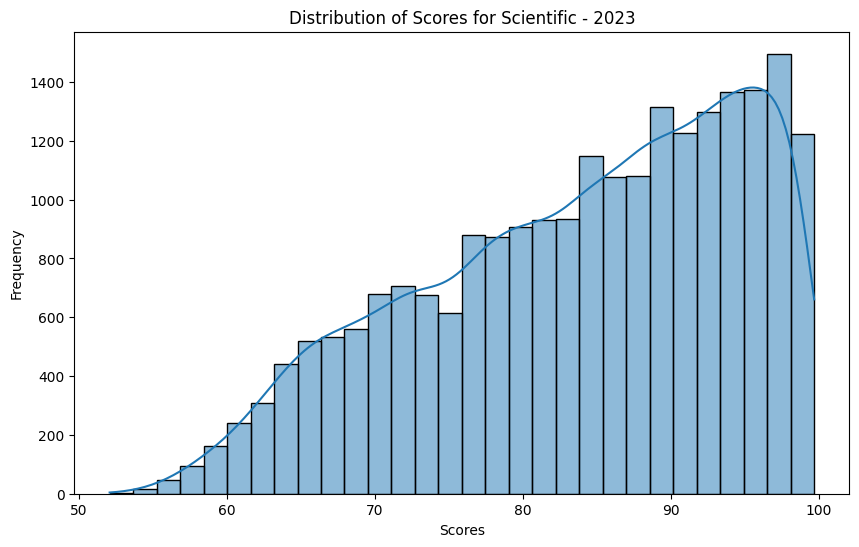

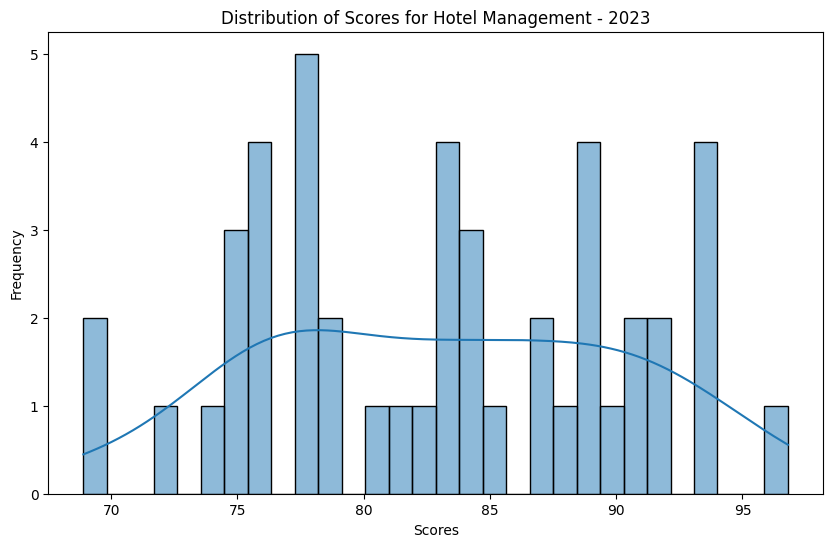

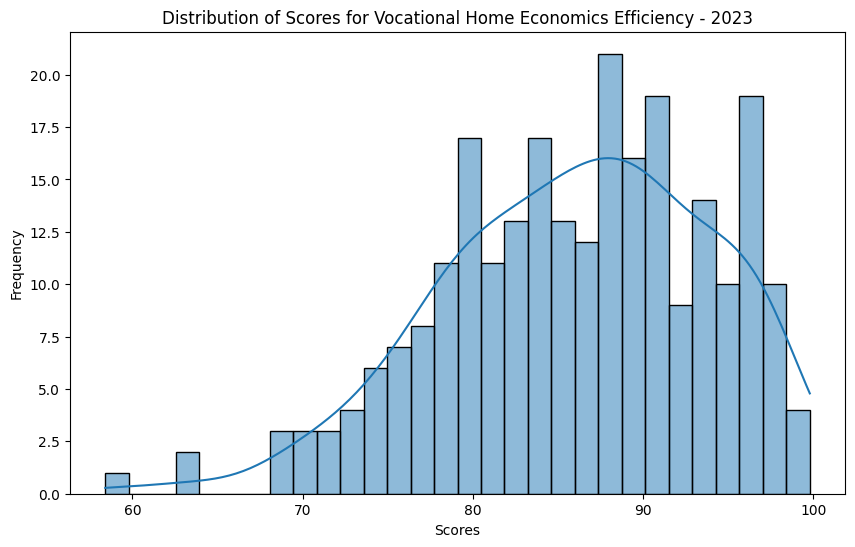

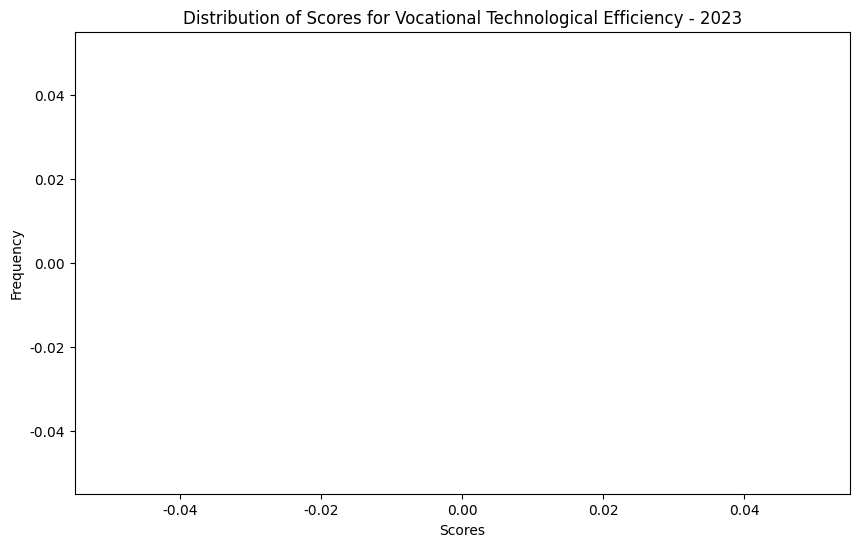

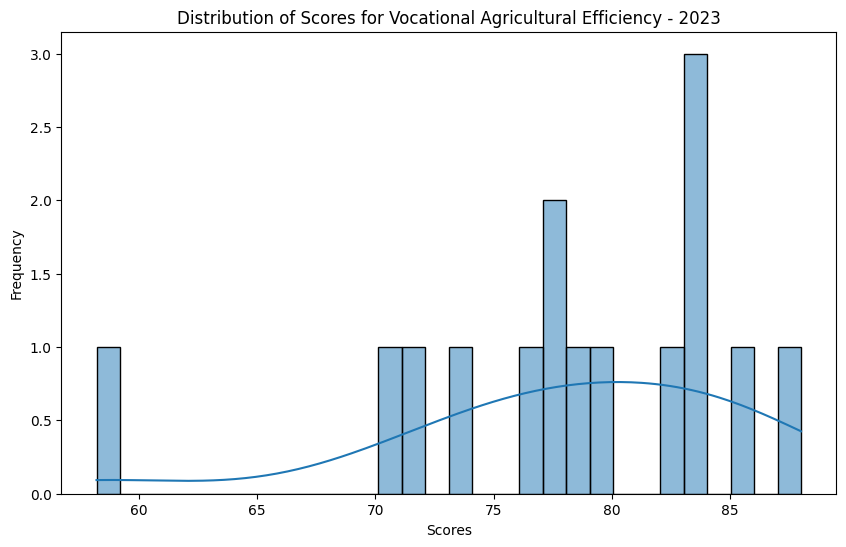

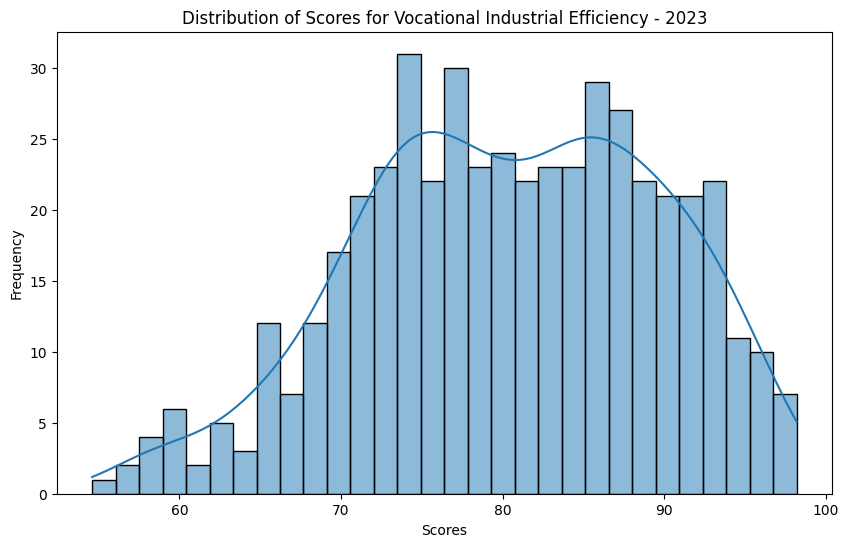

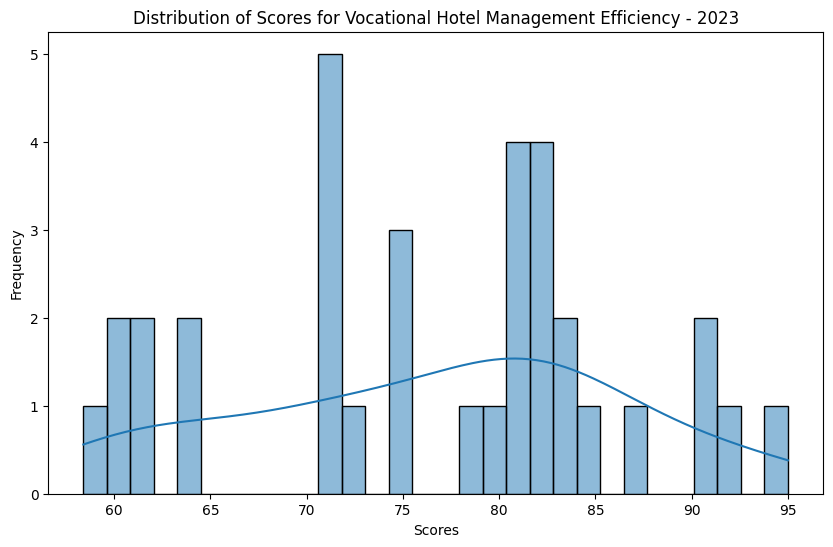

In [31]:
# Load the cleaned datasets
data_2020_cleaned = pd.read_csv('cleaned_data_2020.csv')
data_2023_cleaned = pd.read_csv('cleaned_data_2023.csv')

# Rename branches for better visualization
branch_rename = {
    "الأدبي": "Literary",
    "الاقتصاد المنزلي": "Home Economics",
    "التكنولوجي": "Technological",
    "الريادة و الأعمال": "Business Administration",
    "الريادة والأعمال": "Business Administration",
    "الزراعي": "Agricultural",
    "الزراعي المهني": "Vocational Agricultural Efficiency",
    "الشرعي": "Sharia",
    "الصناعي": "Industrial",
    "العلمي": "Scientific",
    "الفندقي": "Hotel Management",
    "كفاءة مهنية اقتصاد منزلي": "Vocational Home Economics Efficiency",
    "كفاءة مهنية تكنولوجي": "Vocational Technological Efficiency",
    "كفاءة مهنية زراعي": "Vocational Agricultural Efficiency",
    "كفاءة مهنية صناعي": "Vocational Industrial Efficiency",
    "كفاءة مهنية فندقي": "Vocational Hotel Management Efficiency"
}

# Replace branch names in the datasets
data_2020_cleaned['branch'] = data_2020_cleaned['branch'].replace(branch_rename)
data_2023_cleaned['branch'] = data_2023_cleaned['branch'].replace(branch_rename)

# Define branches to analyze
branches = list(branch_rename.values())

# Function to create histograms and density plots for each branch
def plot_distribution(data, branches, year):
    for branch in branches:
        plt.figure(figsize=(10, 6))
        sns.histplot(data[data['branch'] == branch]['average'], kde=True, bins=30)
        plt.title(f'Distribution of Scores for {branch} - {year}')
        plt.xlabel('Scores')
        plt.ylabel('Frequency')
        plt.show()

# Plot distributions for 2020 data
plot_distribution(data_2020_cleaned, branches, 2020)

# Plot distributions for 2023 data
plot_distribution(data_2023_cleaned, branches, 2023)


In [33]:
from matplotlib.backends.backend_pdf import PdfPages

# Create a PdfPages object to save the plots
pdf_filename = 'distribution_density_plots.pdf'
with PdfPages(pdf_filename) as pdf:
    # Function to create histograms and density plots for each branch
    def plot_distribution(data, branches, year):
        for branch in branches:
            plt.figure(figsize=(10, 6))
            sns.histplot(data[data['branch'] == branch]['average'], kde=True, bins=30)
            plt.title(f'Distribution of Scores for {branch} - {year}')
            plt.xlabel('Scores')
            plt.ylabel('Frequency')
            pdf.savefig()  # Save the current figure into the PDF
            plt.close()    # Close the figure to avoid displaying it in the notebook

    # Plot distributions for 2020 data
    plot_distribution(data_2020_cleaned, branches, 2020)

    # Plot distributions for 2023 data
    plot_distribution(data_2023_cleaned, branches, 2023)

print(f'All plots have been saved to {pdf_filename}')

All plots have been saved to distribution_density_plots.pdf


**Analysis of Outliers**

In [34]:
# Z-score Method:
# 2020
# Assuming 'average' is the column with scores
data_2020_cleaned['z_score'] = np.abs(stats.zscore(data_2020_cleaned['average']))
outliers_z = data_2020_cleaned[data_2020_cleaned['z_score'] > 3]

In [35]:
outliers_z

,gender,year,directorate,branch,sum,average,area,z_score
68696,الإجمالي,NaN,NaN,40107,NaN,40107.0,NaN,261.133355


In [44]:
# Z-score Method:
# 2023
# Assuming 'average' is the column with scores
data_2023_cleaned['z_score'] = np.abs(stats.zscore(data_2023_cleaned['average']))
outliers_z = data_2020_cleaned[data_2023_cleaned['z_score'] > 3]

<ipython-input-44-f14bd6239c64>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers_z = data_2020_cleaned[data_2023_cleaned['z_score'] > 3]


In [45]:
outliers_z

,gender,year,directorate,branch,sum,average,area,z_score


In [36]:
# IQR Method:2020
Q1 = data_2020_cleaned['average'].quantile(0.25)
Q3 = data_2020_cleaned['average'].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = data_2020_cleaned[(data_2020_cleaned['average'] < (Q1 - 1.5 * IQR)) | (data_2020_cleaned['average'] > (Q3 + 1.5 * IQR))]

In [37]:
outliers_iqr

,gender,year,directorate,branch,sum,average,area,z_score
68696,الإجمالي,NaN,NaN,40107,NaN,40107.0,NaN,261.133355


In [46]:
# IQR Method:2023
Q1 = data_2023_cleaned['average'].quantile(0.25)
Q3 = data_2023_cleaned['average'].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = data_2023_cleaned[(data_2023_cleaned['average'] < (Q1 - 1.5 * IQR)) | (data_2023_cleaned['average'] > (Q3 + 1.5 * IQR))]

In [47]:
outliers_iqr

,area,year,school,average,branch,school_gender,z_score
70716,الإجمالي,NaN,NaN,70716.0,NaN,70716,265.612265


In [38]:
# Remove the summary or aggregate rows from the dataset
data_2020_cleaned = data_2020_cleaned[~data_2020_cleaned['gender'].isin(['الإجمالي'])]

# Re-run the Z-score method for outlier detection
data_2020_cleaned['z_score'] = np.abs(stats.zscore(data_2020_cleaned['average']))
outliers_z = data_2020_cleaned[data_2020_cleaned['z_score'] > 3]

# Display the detected outliers
print(outliers_z)


Empty DataFrame
Columns: [gender, year, directorate, branch, sum, average, area, z_score]
Index: []


In [39]:
Q1 = data_2020_cleaned['average'].quantile(0.25)
Q3 = data_2020_cleaned['average'].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = data_2020_cleaned[(data_2020_cleaned['average'] < (Q1 - 1.5 * IQR)) | (data_2020_cleaned['average'] > (Q3 + 1.5 * IQR))]


In [40]:
outliers_iqr

,gender,year,directorate,branch,sum,average,area,z_score


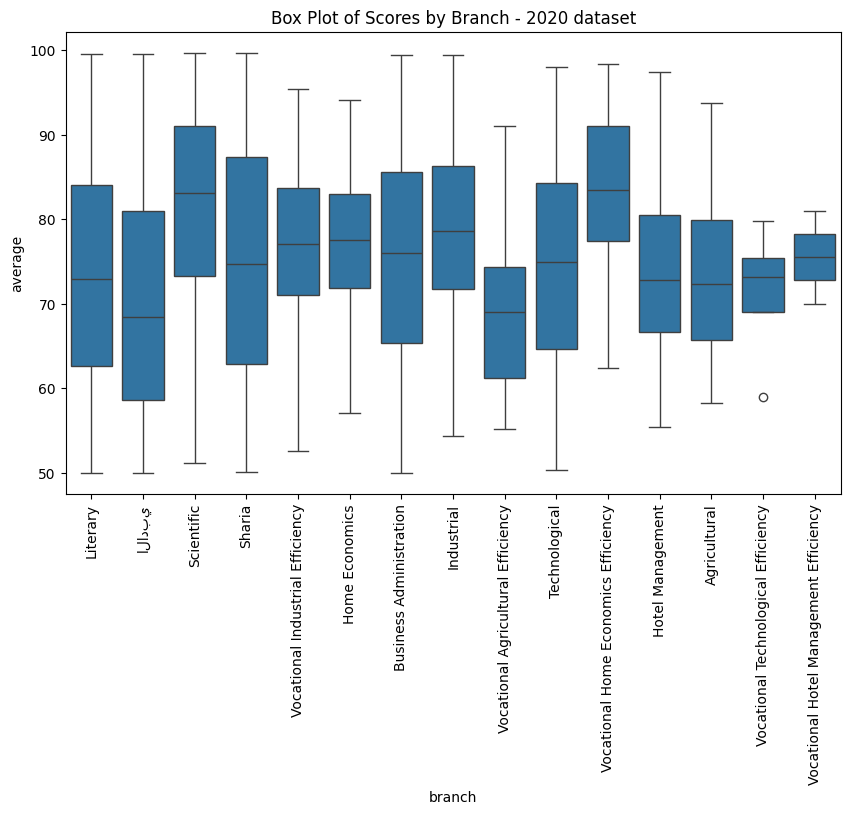

<ipython-input-50-28a6daff4eb3>:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='branch', y='average', data=outliers_iqr, hue='branch', palette='deep')


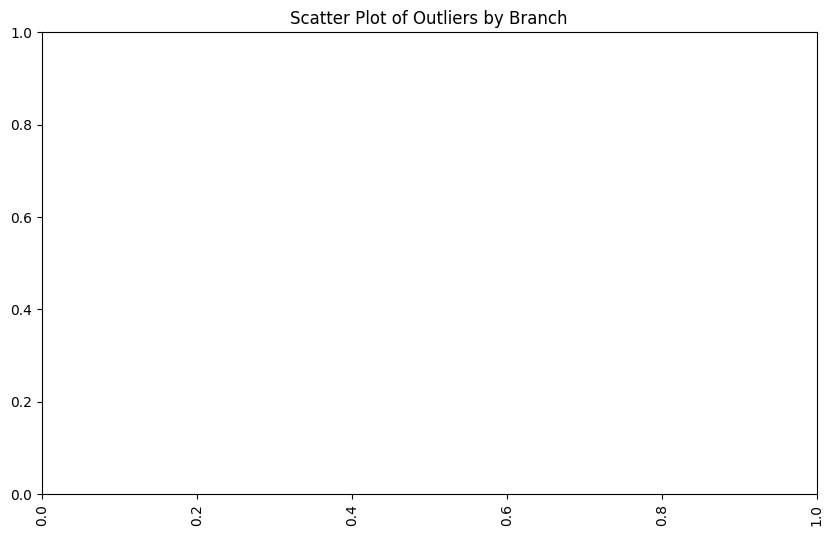

In [50]:
# Visualization
# 2020
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='branch', y='average', data=data_2020_cleaned)
plt.xticks(rotation=90)
plt.title('Box Plot of Scores by Branch - 2020 dataset')
plt.show()

# Scatter plot for outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='branch', y='average', data=outliers_iqr, hue='branch', palette='deep')
plt.xticks(rotation=90)
plt.title('Scatter Plot of Outliers by Branch')
plt.show()


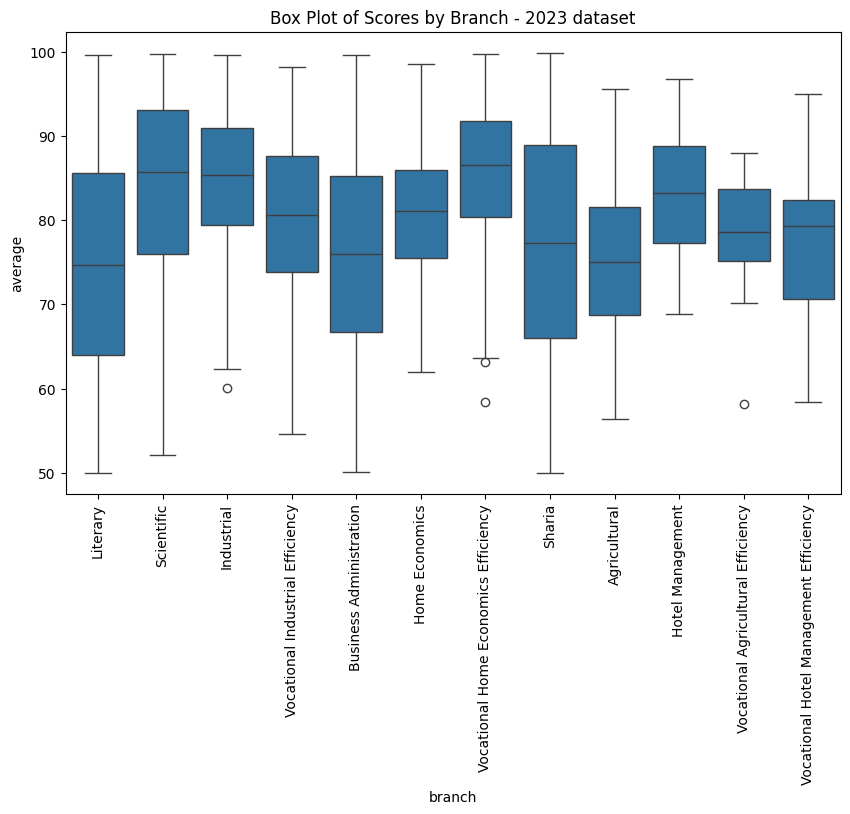

<ipython-input-49-89bad7effb09>:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='branch', y='average', data=outliers_iqr, hue='branch', palette='deep')


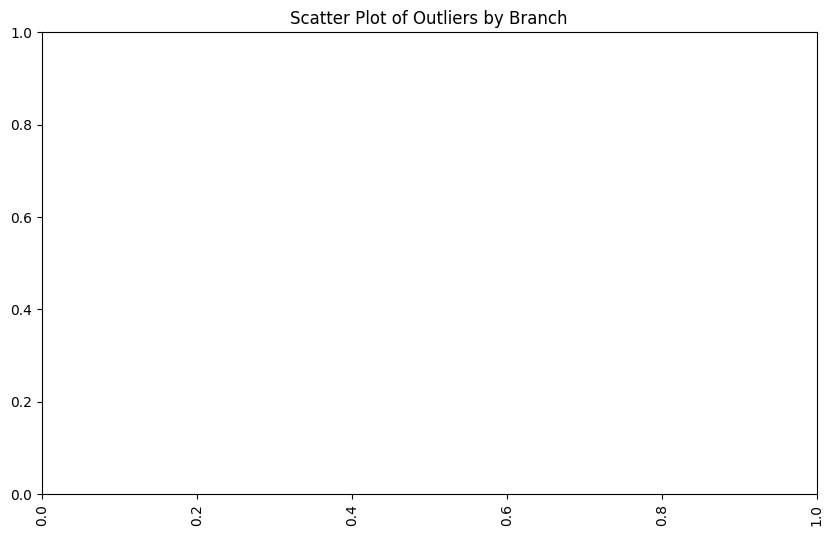

In [49]:
# Visualization
# 2023
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='branch', y='average', data=data_2023_cleaned)
plt.xticks(rotation=90)
plt.title('Box Plot of Scores by Branch - 2023 dataset')
plt.show()

# Scatter plot for outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='branch', y='average', data=outliers_iqr, hue='branch', palette='deep')
plt.xticks(rotation=90)
plt.title('Scatter Plot of Outliers by Branch')
plt.show()

**Predictive Models**

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the cleaned dataset (assuming it is already cleaned and prepared)
data = pd.read_csv('cleaned_data_2020.csv')

# Drop rows with any NaN values
# drop any rows containing NaN values before proceeding with the encoding, splitting, training, and evaluation of the models.
data = data.dropna()

# Encode categorical variables including 'directorate'
data = pd.get_dummies(data, columns=['branch', 'gender', 'area', 'directorate'], drop_first=True)

# Define the target variable and feature set
X = data.drop(columns=['average'])
y = data['average']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
linear_model = LinearRegression()
tree_model = DecisionTreeRegressor(random_state=42)
forest_model = RandomForestRegressor(random_state=42)

# Train the models
linear_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
forest_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)
y_pred_tree = tree_model.predict(X_test)
y_pred_forest = forest_model.predict(X_test)

# Evaluate the models
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

mae_forest = mean_absolute_error(y_test, y_pred_forest)
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

# Print the results
print("Linear Regression - MAE:", mae_linear, "MSE:", mse_linear, "R2:", r2_linear)
print("Decision Tree - MAE:", mae_tree, "MSE:", mse_tree, "R2:", r2_tree)
print("Random Forest - MAE:", mae_forest, "MSE:", mse_forest, "R2:", r2_forest)


Linear Regression - MAE: 0.12150507582024439 MSE: 0.739428988259505 R2: 0.9957487737277132
Decision Tree - MAE: 0.038378439731196805 MSE: 0.38853193547619636 R2: 0.9977661990563735
Random Forest - MAE: 0.04516033968823123 MSE: 0.37049722540186875 R2: 0.9978698866781714


**Comparative Statistical Analysis**

ANOVA and t-tests on Student Performance Across Years, Regions, and Branches

In [81]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load the cleaned datasets
data_2020 = pd.read_csv('cleaned_data_2020.csv')
data_2023 = pd.read_csv('cleaned_data_2023.csv')

# Drop rows with missing values in 'average' or 'branch' columns
data_2020 = data_2020.dropna(subset=['average', 'branch'])
data_2023 = data_2023.dropna(subset=['average', 'branch'])

# Ensure the columns are of correct data type
data_2020['branch'] = data_2020['branch'].astype(str)
data_2023['branch'] = data_2023['branch'].astype(str)

# ANOVA: Comparing average scores between branches within each year
anova_2020 = ols('average ~ C(branch)', data=data_2020).fit()
anova_table_2020 = sm.stats.anova_lm(anova_2020, typ=2)

anova_2023 = ols('average ~ C(branch)', data=data_2023).fit()
anova_table_2023 = sm.stats.anova_lm(anova_2023, typ=2)

print("ANOVA results for 2020 data:")
print(anova_table_2020)

print("\nANOVA results for 2023 data:")
print(anova_table_2023)

# t-test: Comparing average scores between West Bank and Gaza for each year
t_test_2020 = sm.stats.ttest_ind(data_2020[data_2020['area'] == 'WB']['average'],
                                 data_2020[data_2020['area'] == 'GA']['average'])

t_test_2023 = sm.stats.ttest_ind(data_2023[data_2023['area'] == 'WB']['average'],
                                 data_2023[data_2023['area'] == 'GA']['average'])

print("\nt-test results for 2020 data (WB vs GA):")
print(t_test_2020)

print("\nt-test results for 2023 data (WB vs GA):")
print(t_test_2023)


ANOVA results for 2020 data:
                 sum_sq       df          F  PR(>F)
C(branch)  1.475975e+06     16.0  609.15838     0.0
Residual   1.040046e+07  68679.0        NaN     NaN

ANOVA results for 2023 data:
                 sum_sq       df           F  PR(>F)
C(branch)  1.316686e+06     11.0  811.233772     0.0
Residual   1.043248e+07  70704.0         NaN     NaN

t-test results for 2020 data (WB vs GA):
(29.5393701425894, 1.412431937986496e-190, 68694.0)

t-test results for 2023 data (WB vs GA):
(21.170276707166572, 3.65213420307276e-99, 70714.0)
